*Notes*

* Since we are taking a video of the gague, take a difference image between two frames. They will have the same background, but the needle will move. The backgroudn and needle are revealed in the difference. (The background doesn't change, but the needle does.)
* Better to use $r$, $\theta$ for lines instead of $m$, $b$ so the computer doesn't have to deal with infinite slope for vertical lines.

In [2]:
import cv2 as cv
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import math

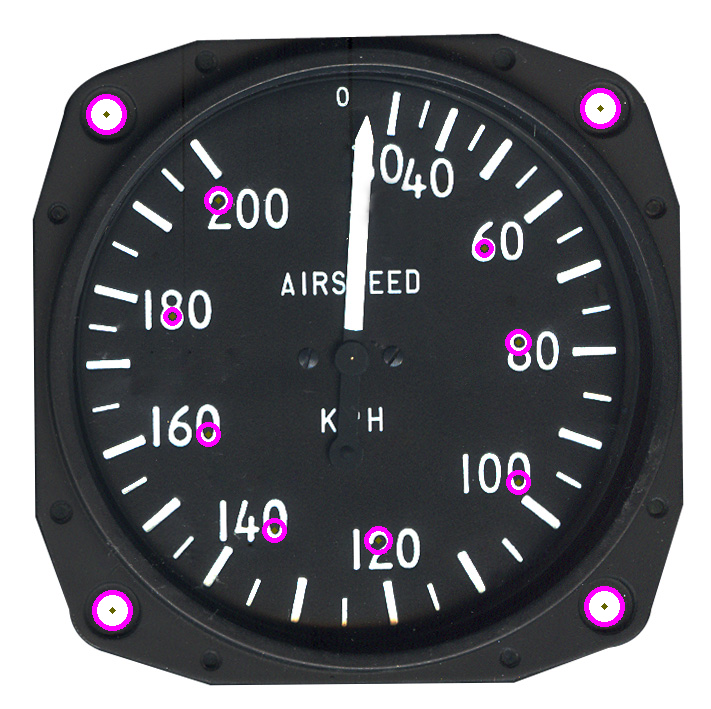

-1

In [28]:
filename = "Test image 2.jpeg"
# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR)
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')


gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


gray = cv.medianBlur(gray, 5)


rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=1, maxRadius=30)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 3)


cv2_imshow(src)
cv.waitKey(0)

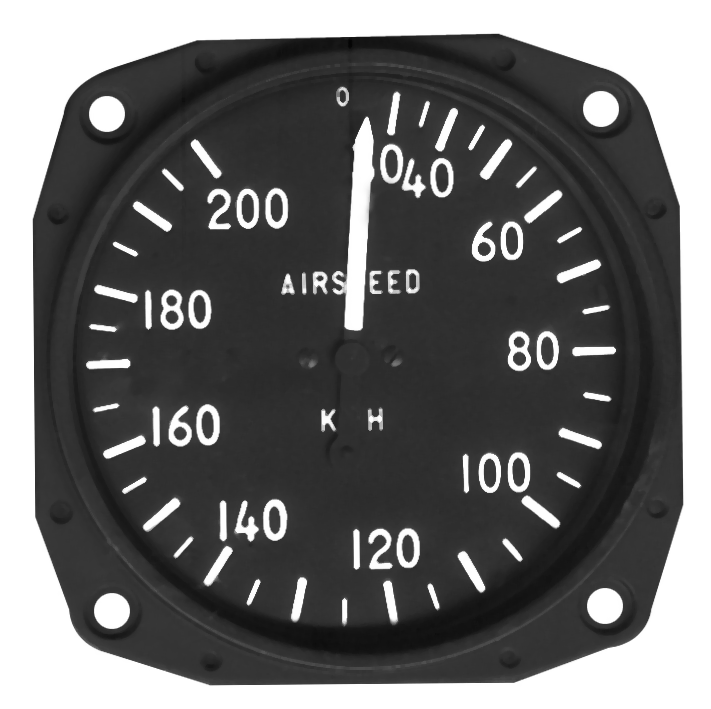

In [7]:
cv2_imshow(gray)

In [24]:
lines = cv.HoughLines(gray, 1, 0.01, 1000)

In [25]:

lines.shape

(28, 1, 2)

In [26]:
for line in lines:
  print(line)
  break

[[-4.    2.36]]


In [29]:
for i in range(0, len(lines)):
  rho = lines[i][0][0]
  theta = lines[i][0][1]
  a = math.cos(theta)
  b = math.sin(theta)
  x0 = a * rho
  y0 = b * rho
  pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
  pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
  cv.line(src, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

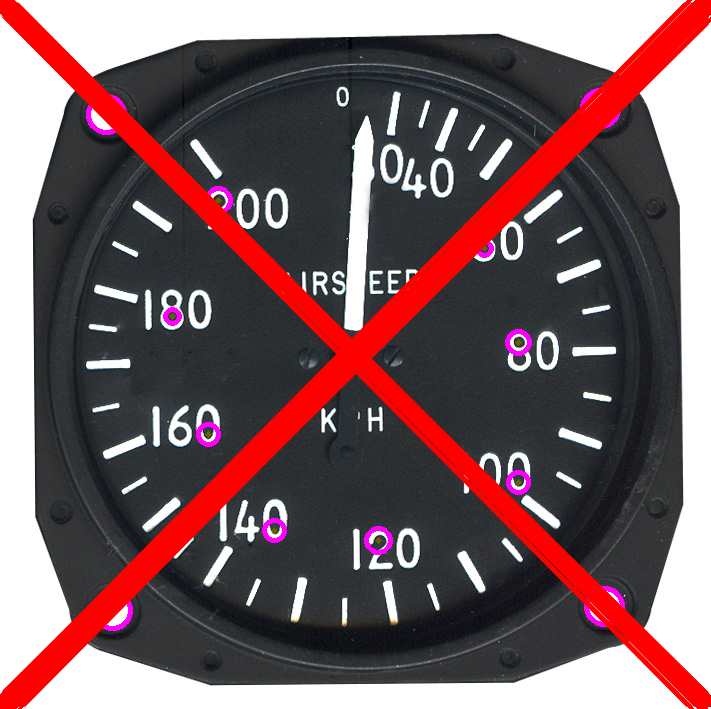

In [30]:
cv2_imshow(src)